In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn import svm, naive_bayes, datasets, decomposition,metrics, ensemble, neighbors

# Carregando o Dataeset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['ID number','Thickness', 'Cell_Size', 'Cell_Shape', 'Adhesion', 'Epithelial', 'Bare', 'Bland', 'Normal', 'Mitoses', 'Class']
ds = pd.read_csv(url, names=names, sep=',')
ds = ds.drop(columns=['Bare'],axis =1 )
#ds['Class'] = ds['Class'].astype(str)
print(ds.head(5))

   ID number  Thickness  Cell_Size  Cell_Shape  Adhesion  Epithelial  Bland  \
0    1000025          5          1           1         1           2      3   
1    1002945          5          4           4         5           7      3   
2    1015425          3          1           1         1           2      3   
3    1016277          6          8           8         1           3      3   
4    1017023          4          1           1         3           2      3   

   Normal  Mitoses  Class  
0       1        1      2  
1       2        1      2  
2       1        1      2  
3       7        1      2  
4       1        1      2  


In [49]:
ds.isna().sum()
#ds.info()

ID number     0
Thickness     0
Cell_Size     0
Cell_Shape    0
Adhesion      0
Epithelial    0
Bland         0
Normal        0
Mitoses       0
Class         0
dtype: int64

PCA representa 100.00% da informação original


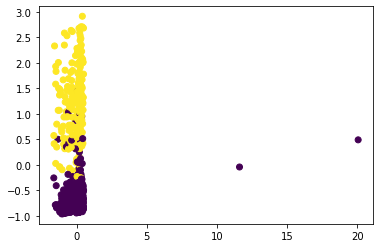

In [50]:
pca = decomposition.PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(ds.drop(columns=['Class']))
X = pca.transform(ds.drop(columns=['Class']))


y = ds['Class']
labels = ['benign','malignant']

plt.scatter(X[:,0],X[:,1],c=y)

print('PCA representa %6.2f%% da informação original'%(sum(pca.explained_variance_ratio_)*100))

#X = ds[:, :2]
#y = ds['Class']

In [51]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def clf_meshgrid(clf,x,y):
  cc = clf.predict(np.c_[x.ravel(),y.ravel()])
  return cc

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

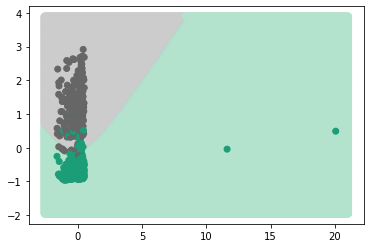

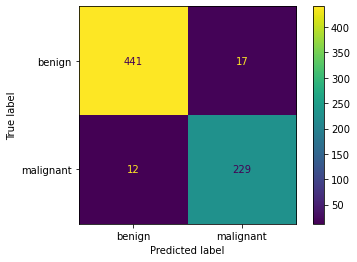

In [52]:
NBGauss = naive_bayes.GaussianNB()
NBGauss = NBGauss.fit(X,y)

c = clf_meshgrid(NBGauss,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(NBGauss, X, y,include_values=True,display_labels=labels)

plt.show()

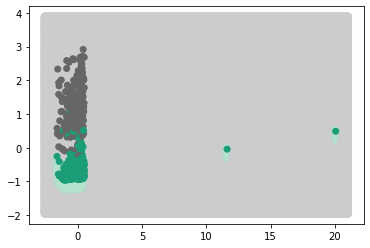

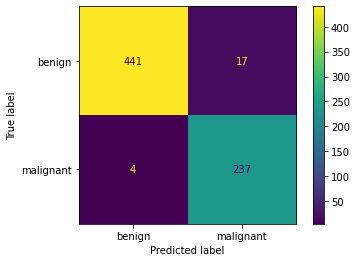

In [53]:
svmRBF = svm.SVC(kernel='rbf', gamma = 12, probability = True)
svmRBF = svmRBF.fit(X,y)

c = clf_meshgrid(svmRBF,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmRBF, X, y,include_values=True,display_labels=labels)

plt.show()